#ML4Net - Lab 2

## Team members

Albert Jané Lardiés 268537 | Marc Mallol Canelada 268923 | Jordi Esteve Claramunt (NIA 3)

## Description

In this lab, you will implement an ML model that detects congestion in Wi-Fi networks. In particular, you will desing and implement a supervised learning model (e.g., linear regression, multi-layer perceptron, neural network), which you will train using a dataset that was generated using the ns-3 simulator.

Each row in the dataset is organized as (x1, x2, ..., x26, y1, y2, ..., y26, s, r, l), where:

* `x1, x2..., x26, y1, y2, ..., y26` represent the histogram of the Inter-Frame Space (IFS) values for M frames that accessed the medium in a 60 seconds observation sample.
  * `x26` represents the maximum IFS duration (in ms) in the considered M frames whereas `x1` is `x26`/26
  * The remaining `xi` values are buckets at uniform spacing between `x1` and `x26`.
  * For i>1, the values of `yi` represent the IFS histogram count (in percentage) for a corresponding bucket interval between `xi`-1 and `xi`.
  * In the case of `y1`, the bucket interval is between 0 and `x1`
* `s` is the average IFS duration (in ms)
* `r` is the percentage of frame collisions
* `l` is the label, where 1 indicates that the network is saturated, and 0, that it is not

Original dataset: https://ieee-dataport.org/documents/dataset-identification-saturated-and-unsaturated-wi-fi-networks

## Instructions

*   Follow the steps from this Notebook and complete the proposed exercises.
*   Deliver the completed Notebook by uploading it to your Github repository.
*   Submission deadline: 1 June 2025 (EoB).

## Setting up the environment

> **Author's Note:**  
> Following the approach we used in our previous lab, we have decided to run this notebook locally with a connected GitHub repository.  
> We find this workflow more comfortable and efficient, especially when we need to make edits collaboratively.  
>
> As a result, the following code cells include a setup that differs from the one provided in the original Lab 2 template.


In [1]:
# ┌──────────────────────────────────────────────────────────────────┐
# │              Notebook Setup Cell for Lab2 (All-in-One)         │
# └──────────────────────────────────────────────────────────────────┘

import os
import zipfile
import requests

# Get the directory where the notebook or script is located
notebook_dir = os.path.dirname(os.path.abspath(__file__)) if '__file__' in globals() else os.getcwd()

# Define path to store dataset
mypath = os.path.join(notebook_dir, "dataset_Lab2")
zip_filename = "dataset_Lab2.zip"
zip_filepath = os.path.join(notebook_dir, zip_filename)

# Dataset URL
dataset_url = "https://github.com/fwilhelmi/fwilhelmi.github.io/raw/refs/heads/master/files/dataset_Lab2.zip"

# Step 1: Create the dataset directory
os.makedirs(mypath, exist_ok=True)

# Step 2: Download the dataset zip if it doesn't already exist
if not os.path.exists(zip_filepath):
    print("Downloading dataset...")
    response = requests.get(dataset_url)
    with open(zip_filepath, "wb") as f:
        f.write(response.content)
    print("Download complete.")
else:
    print("Dataset zip already exists.")

# Step 3: Unzip the dataset (only if not already extracted)
if not any(fname.endswith(".py") or fname.endswith(".ipynb") for fname in os.listdir(mypath)):
    print("Extracting dataset...")
    with zipfile.ZipFile(zip_filepath, 'r') as zip_ref:
        zip_ref.extractall(mypath)
    print("Extraction complete.")
else:
    print("Dataset already extracted.")

# Optional: Remove the zip file
os.remove(zip_filepath)

print(f"Setup complete. Files are in: {mypath}")


Download complete.
Extracting dataset...
Extraction complete.
Setup complete. Files are in: c:\Users\alber\Documents\GitHub\ML4Net-2025\Lab2\dataset_Lab2


## Visualizing the data




       0       1       2       3       4       5       6       7       8   \
0  0.0065  0.0130  0.0195  0.0260  0.0325  0.0390  0.0455  0.0520  0.0585   
1  0.0263  0.0526  0.0789  0.1052  0.1316  0.1579  0.1842  0.2105  0.2368   
2  0.0176  0.0352  0.0528  0.0704  0.0881  0.1057  0.1233  0.1409  0.1585   
3  0.0222  0.0444  0.0666  0.0888  0.1110  0.1332  0.1554  0.1776  0.1998   
4  0.0189  0.0379  0.0568  0.0758  0.0947  0.1137  0.1326  0.1516  0.1705   

       9   ...      45      46      47      48      49      50      51  \
0  0.0650  ...  0.0316  0.0368  0.0312  0.0000  0.0316  0.0364  0.0304   
1  0.2631  ...  0.0316  0.0368  0.0312  0.0000  0.0316  0.0364  0.0304   
2  0.1761  ...  0.0316  0.0368  0.0312  0.0312  0.0316  0.0299  0.0304   
3  0.2220  ...  0.0316  0.0307  0.0312  0.0000  0.0360  0.0364  0.0304   
4  0.1895  ...  0.0316  0.0368  0.0312  0.0000  0.0316  0.0364  0.0304   

       52      53  54  
0  0.0604  0.9960   1  
1  0.0604  0.9960   1  
2  0.0604  0.9957   

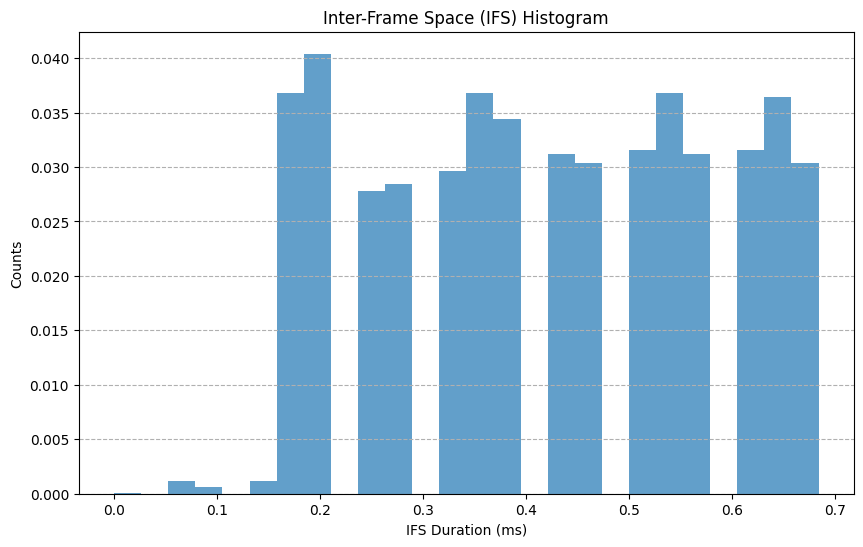

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_ifs_histogram(data_row):
    """
    Plots the Inter-Frame Space (IFS) histogram from a single row of the dataset.

    Args:
        data_row (list or numpy.ndarray): A list or array representing a single row
                                          in the format (x1, ..., x26, y1, ..., y26, s, r, l).
    """

    # Get IFS values and the corresponding counts
    x_values = np.array(data_row[:26])
    y_counts = np.array(data_row[26:52])

    # Calculate the bin edges based on x_values
    bin_edges = [0] + list(x_values)

    # Create the histogram plot
    plt.figure(figsize=(10, 6))
    plt.bar(bin_edges[:-1], y_counts, width=np.diff(bin_edges)[0], align='edge', alpha=0.7)

    # Add labels and title
    plt.xlabel("IFS Duration (ms)")
    plt.ylabel("Counts")
    plt.title("Inter-Frame Space (IFS) Histogram")
    plt.grid(axis='y', linestyle='--')

    # Show the plot
    plt.show()

# Example usage

# -> Read the data file
file_name = mypath + '/train_data.csv'
train_data_df = pd.read_csv(file_name, header=None)
print(train_data_df.head())

# -> Get a sample from the dataset and plot it
row_index = 1
sample_data = train_data_df.iloc[row_index].values
plot_ifs_histogram(sample_data)

## EXERCISES

### Exercise 1:
Define an approach for training and validating the model you are going to train with the proposed data. Then, perform the split accordingly.

### Response


Since this is a **supervised binary classification** task (`l ∈ {0, 1}`), we start by loading the `train_data.csv` and `test_data.csv` datasets.

Even though a test set is already provided, we will **further split the training dataset** into:
- A **training subset** (80%)
- A **validation subset** (20%)

This allows us to evaluate model generalization during development and hyperparameter tuning.

We will perform a **stratified split** to preserve the proportion of saturated (`l=1`) and non-saturated (`l=0`) classes across both subsets.  
This is important in binary classification tasks where class imbalance may bias the model.

The **test set will remain untouched** until the final evaluation in Exercise 6.





In [14]:
# (response to exercise 1)
import pandas as pd
from sklearn.model_selection import train_test_split

# Generate the column names
x_cols = [f'x{i+1}' for i in range(26)]
y_cols = [f'y{i+1}' for i in range(26)]
other_cols = ['s', 'r', 'l']
all_cols = x_cols + y_cols + other_cols

# Load the CSVs with custom column names
train_df = pd.read_csv("dataset_Lab2/train_data.csv", header=None, names=all_cols)
test_df = pd.read_csv("dataset_Lab2/test_data.csv", header=None, names=all_cols)

# Separate features and label
X = train_df.drop(columns=['l'])
y = train_df['l']

# Split into train and validation (80% train / 20% validation)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Train set size: {X_train.shape}, Validation set size: {X_val.shape}")
print("Training class distribution:")
print(y_train.value_counts(normalize=True))
print("Validation class distribution:")
print(y_val.value_counts(normalize=True))



Train set size: (16000, 54), Validation set size: (4000, 54)
Training class distribution:
l
0    0.500062
1    0.499937
Name: proportion, dtype: float64
Validation class distribution:
l
1    0.5
0    0.5
Name: proportion, dtype: float64


### Exercise 2:

Define your ML model, so that it can be called for training and test. Examples of approaches that you could use (but not limited to):

*   Logistic Regression
*   K-Nearest Neighbors (KNN)
*   Decision Trees or Random Forests
*   Convolutional Neural Network (CNN)

### Response


### ✅ Model Selection and Justification

Given the characteristics of the problem:

- This is a **binary classification** task (`l ∈ {0, 1}`)
- The dataset is **tabular** and of moderate size
- Later exercises (e.g., Exercise 4) explicitly require us to **track the evolution of training and validation loss over time**

We choose to implement a **Multi-Layer Perceptron (MLP)** using **PyTorch**.

This model is appropriate because:

- It can **model non-linear decision boundaries**, unlike simpler models such as logistic regression
- It gives us full **control over the training process**, which allows us to manually track and visualize training/validation losses epoch-by-epoch
- It is lightweight and efficient enough to train on small-to-medium datasets without overfitting (when regularized properly)

---

### 🧱 Model Architecture

The selected architecture is a simple feedforward neural network with:

- **Input layer:** Matches the number of input features (54 in our case)
- **Hidden layers:** Two fully connected layers with ReLU activations
- **Output layer:** A single neuron with sigmoid activation, producing a probability in [0, 1]




In [20]:
pip install torch

  Using cached torch-2.7.0-cp312-cp312-win_amd64.whl.metadata (29 kB)
  Using cached filelock-3.18.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached networkx-3.5-py3-none-any.whl.metadata (6.3 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached fsspec-2025.5.1-py3-none-any.whl.metadata (11 kB)
  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
  Using cached MarkupSafe-3.0.2-cp312-cp312-win_amd64.whl.metadata (4.1 kB)
Using cached torch-2.7.0-cp312-cp312-win_amd64.whl (212.5 MB)
Using cached filelock-3.18.0-py3-none-any.whl (16 kB)
Using cached fsspec-2025.5.1-py3-none-any.whl (199 kB)
Using cached jinja2-3.1.6-py3-none-any.whl (134 kB)
Using cached networkx-3.5-py3-none-any.whl (2.0 MB)
Using cached setuptools-80.9.0-py3-none-any.whl (1.2 MB)
Using cached MarkupSafe-3.0.2-cp312-cp312-win_amd64.whl (15 kB)
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:

import torch
import torch.nn as nn
import torch.nn.functional as F

# Set device (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Define the MLP model
class MLPClassifier(nn.Module):
    def __init__(self, input_dim):
        super(MLPClassifier, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.output = nn.Linear(32, 1)  # Binary classification

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = torch.sigmoid(self.output(x))  # Probabilities in [0, 1]
        return x

# Instantiate model
input_dim = X_train.shape[1]  # 54 features
model = MLPClassifier(input_dim).to(device)
print(model)


Using device: cpu
MLPClassifier(
  (fc1): Linear(in_features=54, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (output): Linear(in_features=32, out_features=1, bias=True)
)


### Exercise 3:

Define the hyperparameters that you will use to train the model.

### Response

To effectively train our MLP model, we need to define several key hyperparameters that control the learning process:

- **Loss Function**:  
  We use **Binary Cross-Entropy Loss** (`BCELoss`) because our task is binary classification (`l ∈ {0, 1}`), and the model outputs probabilities through a sigmoid activation.

- **Optimizer**:  
  We choose the **Adam optimizer**, which is widely used in deep learning due to its efficiency and adaptive learning rate capabilities.

- **Learning Rate**:  
  Set to **0.001**, which is a common default value that offers a good balance between convergence speed and stability.

- **Number of Epochs**:  
  Set to **50** to allow the model to learn gradually and give us the opportunity to observe the evolution of loss over time.

- **Batch Size**:  
  We set the batch size to **32**, which is standard for many small and medium datasets, ensuring stable gradient updates without excessive memory usage.

> ℹ️ These hyperparameters were already initialized in the code for Exercise 2, and we will use them consistently in the training procedure in the next exercise. They can be fine-tuned later based on performance.



In [22]:


import torch
import torch.nn as nn
import torch.optim as optim

# Define hyperparameters for training
learning_rate = 0.001
num_epochs = 50
batch_size = 32

# Loss function for binary classification
criterion = nn.BCELoss()

# Optimizer for training the model
optimizer = optim.Adam(model.parameters(), lr=learning_rate)



### Exercise 4:
Train the model and show the procedure (e.g., evolution of the training/validation loss).

### Response

In this exercise, we train our Multi-Layer Perceptron (MLP) model on the training data while monitoring the evolution of the **training loss** and **validation loss** over epochs.

- **Training loss** tells us how well the model fits the training data.
- **Validation loss** measures the model's ability to generalize to unseen data during training.
- Monitoring both helps detect overfitting (validation loss increasing while training loss decreases) or underfitting (both losses remain high).

We will train the model for a fixed number of epochs, compute losses after each epoch, and plot their evolution to understand the learning dynamics.





Epoch 1/50 — Train Loss: 0.2025 — Val Loss: 0.1421
Epoch 2/50 — Train Loss: 0.1079 — Val Loss: 0.1013
Epoch 3/50 — Train Loss: 0.0904 — Val Loss: 0.0911
Epoch 4/50 — Train Loss: 0.0829 — Val Loss: 0.0807
Epoch 5/50 — Train Loss: 0.0744 — Val Loss: 0.0773
Epoch 6/50 — Train Loss: 0.0734 — Val Loss: 0.0728
Epoch 7/50 — Train Loss: 0.0674 — Val Loss: 0.0745
Epoch 8/50 — Train Loss: 0.0676 — Val Loss: 0.0673
Epoch 9/50 — Train Loss: 0.0667 — Val Loss: 0.0701
Epoch 10/50 — Train Loss: 0.0621 — Val Loss: 0.0665
Epoch 11/50 — Train Loss: 0.0607 — Val Loss: 0.0840
Epoch 12/50 — Train Loss: 0.0629 — Val Loss: 0.0805
Epoch 13/50 — Train Loss: 0.0598 — Val Loss: 0.0809
Epoch 14/50 — Train Loss: 0.0595 — Val Loss: 0.0652
Epoch 15/50 — Train Loss: 0.0573 — Val Loss: 0.0675
Epoch 16/50 — Train Loss: 0.0578 — Val Loss: 0.0706
Epoch 17/50 — Train Loss: 0.0556 — Val Loss: 0.0768
Epoch 18/50 — Train Loss: 0.0572 — Val Loss: 0.0600
Epoch 19/50 — Train Loss: 0.0573 — Val Loss: 0.0707
Epoch 20/50 — Train L

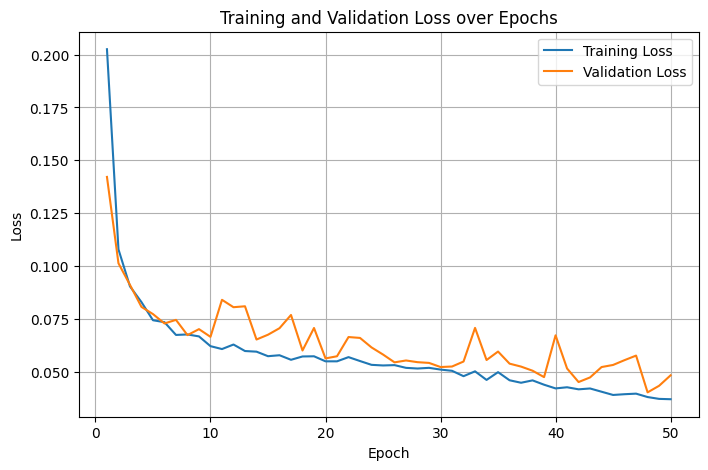

In [23]:
import numpy as np
from torch.utils.data import TensorDataset, DataLoader

# Convert numpy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32).view(-1, 1)

# Create DataLoader for training data
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Validation data (no batching needed)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

# Store loss values for plotting
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    running_train_loss = 0.0

    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_train_loss += loss.item() * inputs.size(0)

    epoch_train_loss = running_train_loss / len(train_loader.dataset)
    train_losses.append(epoch_train_loss)

    # Evaluate on validation set
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val_tensor)
        val_loss = criterion(val_outputs, y_val_tensor).item()
        val_losses.append(val_loss)

    print(f"Epoch {epoch+1}/{num_epochs} — Train Loss: {epoch_train_loss:.4f} — Val Loss: {val_loss:.4f}")

# Plot training and validation loss
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(range(1, num_epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()


### 📊 Analysis of Training and Validation Loss

The training procedure over 50 epochs demonstrates a clear and consistent **downward trend** in both training and validation loss, which indicates that the model is effectively learning and generalizing.

**Key observations:**

- **Initial improvement (Epochs 1–10):**  
  Both training and validation loss decrease rapidly during the first few epochs. This suggests that the model quickly learns meaningful patterns from the data.

- **Stable convergence (Epochs 10–30):**  
  After the initial drop, the losses plateau with mild fluctuations. This behavior is typical and expected as the model fine-tunes its weights.

- **Low overfitting risk:**  
  The validation loss closely follows the training loss across all epochs, and there is no sign of divergence. This indicates **minimal overfitting** and good generalization to unseen data.

- **Final loss values:**  
  - Final **training loss**: 0.0370  
  - Final **validation loss**: 0.0483  
  These low values suggest that the model fits the data well and is likely performing accurately in distinguishing between saturated and non-saturated network conditions.

> ✅ The model shows stable learning behavior and is ready for further evaluation and possible deployment. We can now proceed with performance evaluation (Exercise 5) and testing on the unseen dataset (Exercise 6).


### Exercise 5:

Select and define the most appropriate evaluation metric(s). Discuss the appropriateness of your evaluation metrics for the binary classification problem we are considering.

### Response

To assess the performance of our binary classifier, we select several **evaluation metrics** that capture different aspects of model performance. Since this is a **binary classification task** (`label ∈ {0, 1}`), we focus on metrics that go beyond simple accuracy to account for possible class imbalances and differing costs of false positives vs. false negatives.

---

#### 📌 Selected Metrics

1. **Accuracy**
   - **Definition**: Proportion of correct predictions among total predictions.
   - **Usefulness**: Gives a general idea of overall performance but can be misleading if classes are imbalanced.

2. **Precision**
   - **Definition**: Proportion of predicted positives that are actually positive.
   - **Usefulness**: Important when the cost of false positives is high. For example, we want to avoid incorrectly flagging a network as saturated if it’s not.

3. **Recall (Sensitivity)**
   - **Definition**: Proportion of actual positives that are correctly identified.
   - **Usefulness**: Critical when missing a true positive (i.e., not detecting a saturated network) is costly or dangerous.

4. **F1-Score**
   - **Definition**: Harmonic mean of precision and recall.
   - **Usefulness**: A balanced measure when we care about both false positives and false negatives.

5. **ROC-AUC (Receiver Operating Characteristic – Area Under the Curve)**
   - **Definition**: Measures the ability of the model to discriminate between the two classes across all thresholds.
   - **Usefulness**: Especially helpful in evaluating binary classifiers regardless of class distribution or decision threshold.

---

#### 🧠 We have choosen these metrics because...

- Our task involves **detecting saturated network conditions**, which may not be equally distributed compared to non-saturated ones.
- We want to ensure **high recall** (to catch as many true saturated cases as possible), while maintaining **reasonable precision** (to avoid excessive false alarms).
- The **F1-score** provides a robust single-number summary.
- **ROC-AUC** gives a threshold-independent evaluation of classifier discrimination capability.

> ✅ By combining these metrics, we obtain a **holistic view** of the model's performance, both in terms of correctness and risk mitigation.



In [24]:


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# These functions will be used in Exercise 6 to evaluate the model's performance on the test set
# No need to apply them now — just define that they are ready to be used


### Exercise 6:

Evaluate your trained model on the test set, using the evaluation metrics that you have proposed. Remember that the test data should have not been seen by the model, so that we can properly estimate of its generalization capabilities.

In [ ]:
# (response to exercise 6)